<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

Name: loans_cash_count, dtype: float64
0        1.0
1        2.0
4        0.0
7        NaN
8        3.0
12       5.0
27       7.0
45      12.0
63       4.0
131      9.0
190      8.0
247      6.0
1379    10.0
2000    15.0
2974    13.0
Name: latest_one_month_loan, dtype: float64
0        1.0
1        2.0
3        4.0
4        0.0
6        3.0
7        NaN
8       10.0
12       7.0
13       5.0
23       9.0
27      14.0
34       6.0
45      22.0
47      12.0
51      17.0
109      8.0
131     16.0
152     13.0
216     11.0
248     27.0
977     15.0
1313    18.0
1617    30.0
1986    25.0
2088    47.0
2740    19.0
2796    23.0
3087    48.0
3684    52.0
3766    21.0
3788    20.0
4509    38.0
Name: latest_three_month_loan, dtype: float64
0       13.0
1        8.0
2        4.0
3       34.0
4       10.0
5       25.0
6        3.0
7        NaN
8       16.0
9        6.0
11       9.0
13      21.0
14       0.0
15      12.0
16      18.0
19      37.0
20       2.0
22      14.0
23      15.0
33       5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 81 columns):
custid                                        4754 non-null int64
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans_f

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
E:\DataWhale_Data\Task1\Task1.py:188: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


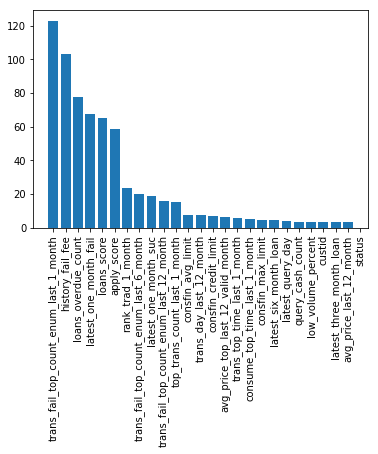

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


样本个数：7122; 1占50.00%; 0占50.00%
准确率:0.8223,精确率:0.8929,召回率:0.7899,f1-score:0.8207,auc:0.8990
Accuracy: 85.59%


[NbConvertApp] Converting notebook Task1.ipynb to python
[NbConvertApp] Writing 7012 bytes to Task1.py


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from Task1 import final_data,X,y,x_train, x_test, y_train, y_test 

In [2]:
def plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test, name=None):
    plt.plot(fpr_train, tpr_train, linewidth=2,c='r',label='train')
    plt.plot(fpr_test, tpr_test, linewidth=2,c='b',label='test')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()

## XGBoost

n_estimators参数调优

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {'n_estimators':range(400,500,600)}
gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=6, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 400}, 0.9280248638558539)

在n_estimators_best = 400条件下 
min_child_weight，max_depth参数调优

In [17]:
param_test = {'max_depth':range(3,10,2), 'min_child_weight':range(1,12,2)}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=400, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9323299485802632)

在以上条件下 微调max_depth

In [15]:


param_test = {'max_depth':[9,10,11], 'min_child_weight':[1,2,3]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=400, max_depth=9, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_



({'max_depth': 11, 'min_child_weight': 1}, 0.9305229442116965)

gamma 参数调优

In [ ]:
param_test = {'gamma':[i/10 for i in range(1,6)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=400, max_depth=9, 
                                                  min_child_weight=3, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

subsample 和 colsample_bytree 参数

In [ ]:
param_test = {'subsample':[i/10 for i in range(5,10)], 'colsample_bytree':[i/10 for i in range(5,10)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=400, max_depth=9, 
                                                  min_child_weight=3, gamma=0.1, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

In [ ]:
reg_alpha 参数

In [ ]:


param_test = {'reg_alpha':[1e-5, 1e-2, 0.1, 0, 1, 100]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=40, max_depth=3, 
                                                  min_child_weight=3, gamma=0.1, subsample=0.9, 
                                                  colsample_bytree=0.85, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_



In [7]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=6,
 min_child_weight=1,
 gamma=0,#惩罚项
 subsample=0.8,#随机选80%的样本
 colsample_bytree=0.8,#随机选特征
#  objective= 'binary:logistic',#lost funation ： logistic
 nthread=3,#均衡样本
 scale_pos_weight=1,
 seed=2018)

In [5]:
from xgboost import XGBClassifier 
xgb = xgb1.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8656995788488535

准确率:0.8657,精确率:0.9024,召回率:0.8183,f1-score:0.8583,auc:0.8654


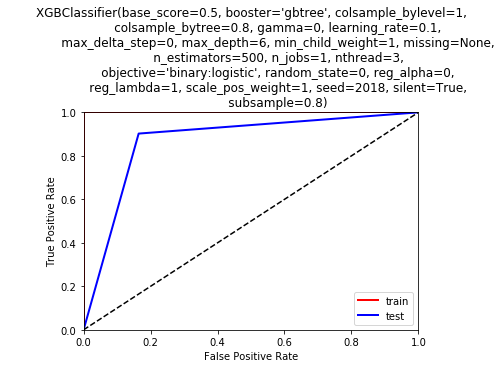

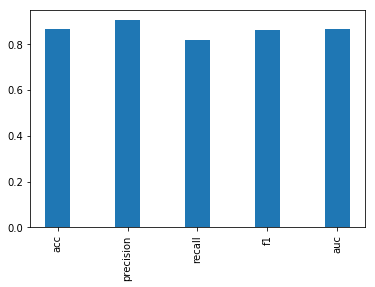

In [47]:
from sklearn import metrics
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,xgb)

predictors = ['acc','precision','recall','f1','auc']
xgb_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), xgb_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## RandomForestClassifier



In [10]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=2,bootstrap=True, max_depth=4, max_features=6)
RF.fit(x_train, y_train)
RF.score(x_test, y_test)

0.7875526438933084

准确率:0.7876,精确率:0.7940,召回率:0.7731,f1-score:0.7834,auc:0.7875


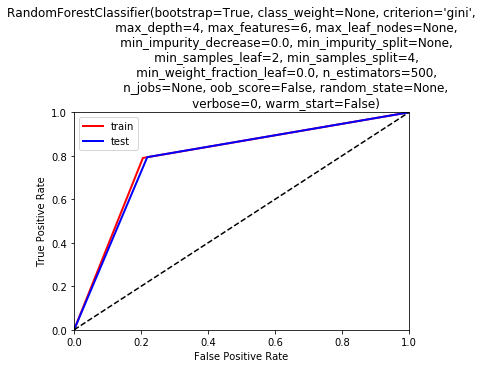

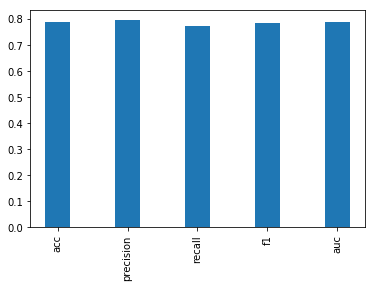

In [53]:
from sklearn import metrics
y_train_pred = RF.predict(x_train)
y_test_pred = RF.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,RF)


RF_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), RF_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7262517547964437

准确率:0.7263,精确率:0.7540,召回率:0.6667,f1-score:0.7076,auc:0.7259


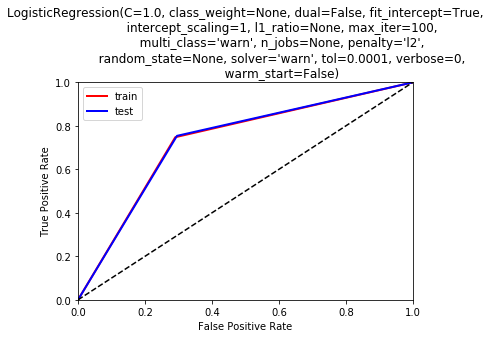

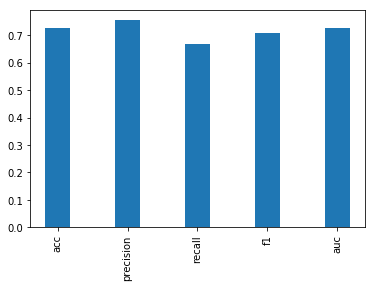

In [52]:
from sklearn import metrics

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,lr)


lr_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), lr_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## SVM

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma='auto',cache_size=5000).fit(x_train,y_train)
svm.score(x_test,y_test)

0.7622835751052878

准确率:0.7623,精确率:0.7608,召回率:0.7608,f1-score:0.7608,auc:0.7623


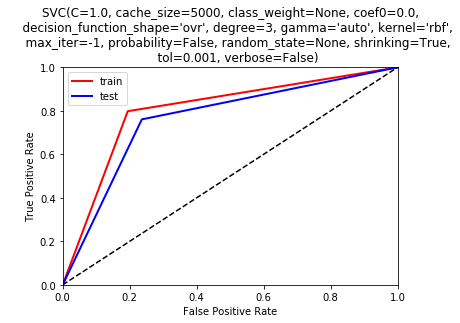

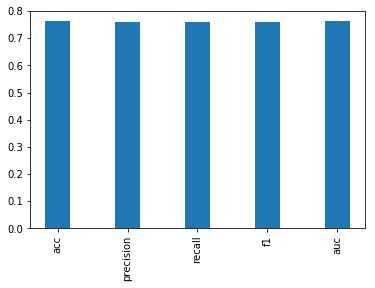

In [50]:
from sklearn import metrics
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,svm)

svm_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), svm_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7674309780065512

准确率:0.7674,精确率:0.7580,召回率:0.7815,f1-score:0.7696,auc:0.7675


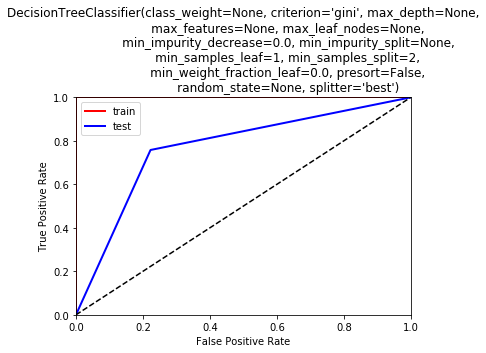

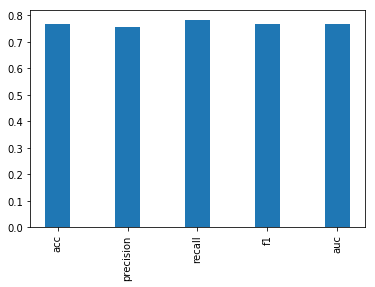

In [54]:
from sklearn import metrics

y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,dtc)

dtc_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), dtc_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [55]:
s = pd.DataFrame( columns=predictors, index=['xgb', 'rf', 'svm', 'lr', 'dtc'])

In [56]:
for i in range(5):
    s.iloc[0][i] = xgb_scores[i]
    s.iloc[1][i] = rf_scores[i]
    s.iloc[2][i] = svm_scores[i]
    s.iloc[3][i] = lr_scores[i]
    s.iloc[4][i] = dtc_scores[i]

In [57]:
s.head()

,acc,precision,recall,f1,auc
xgb,0.8657,0.902388,0.818267,0.858272,0.865413
rf,0.787553,0.794004,0.77307,0.783397,0.787465
svm,0.762284,0.760829,0.760829,0.760829,0.762275
lr,0.726252,0.753994,0.666667,0.707646,0.725891
dtc,0.767431,0.757991,0.781544,0.769587,0.767516
